In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pimg
from tqdm import tqdm

# $F(u,v) = {2\over{N}}C(u)C(v)\sum\limits_{x=0}^{N-1}\sum\limits_{y=0}^{N-1}f(x,y)cos\left[\left(2x+1\right)u\pi\over{2N}\right]cos\left[\left(2y+1\right)v\pi\over{2N}\right]$
# $f(x,y) = {2\over{N}}\sum\limits_{u=0}^{N-1}\sum\limits_{v=0}^{N-1}C(u)C(v)F(u,v)cos\left[\left(2x+1\right)u\pi\over{2N}\right]cos\left[\left(2y+1\right)v\pi\over{2N}\right]$
## $cos\left[\left(2x+1\right)u\pi\over{2N}\right]cos\left[\left(2y+1\right)v\pi\over{2N}\right] = {1\over{2}}\left[cos\{{\pi\over{2N}}\left(\left(2x+1\right)u + \left(2y+1\right)v\right)\}+cos\{{\pi\over{2N}}\left(\left(2x+1\right)u - \left(2y+1\right)v\right)\}\right]$
# $C(k) = {1\over\sqrt{2}} (k=0), 1 (k\neq0)$

In [193]:
S = 256

In [194]:
cat = pimg.open("./cat.jpg").convert("L")
cat = cat.resize((S,S))
cat_arr = np.array(cat).astype(np.int32)
cat_arr -=128

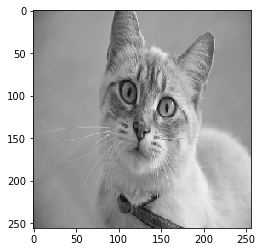

In [195]:
plt.imshow(cat_arr, cmap="gray", vmin=-128, vmax=127)

In [218]:
F = np.zeros((16,16))
for u in tqdm(range(16)):
    cu = 1/math.sqrt(2) if u==0 else 1
    for v in range(16):
        cv = 1/math.sqrt(2) if v==0 else 1
        val = 1/2/S
        t = 0
        for x in range(S):
            for y in range(S):
                t+=cat_arr[y][x]*(math.cos(math.pi/2/S*((2*x+1)*u+(2*y+1)*v)) + math.cos(math.pi/2/S*((2*x+1)*u - (2*y+1)*v)))
        val *= cu*cv*t
        F[u][v] = val


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:21<00:00,  5.27s/it]

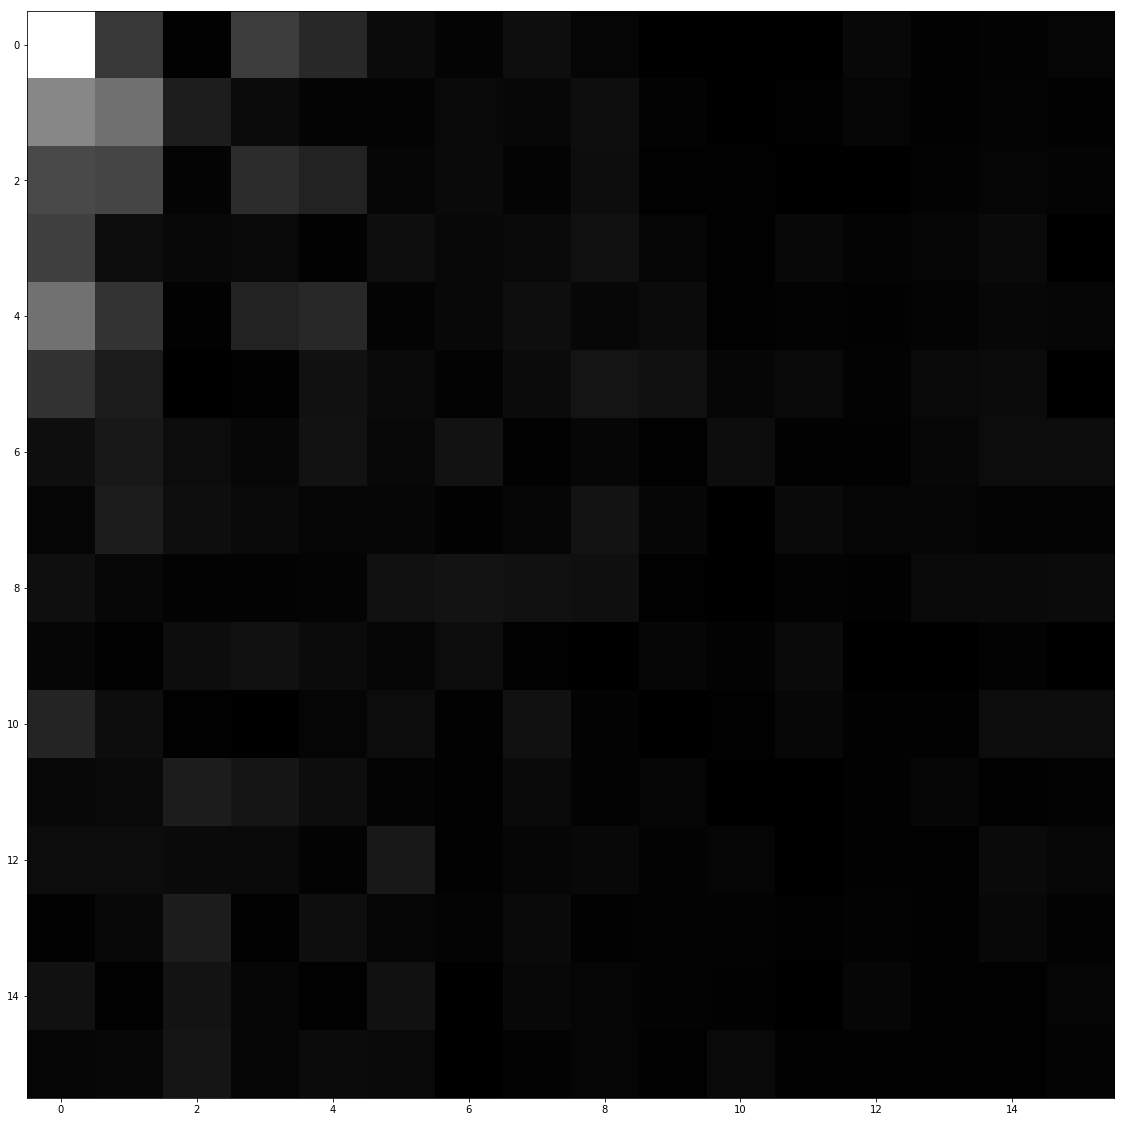

In [219]:
fig = plt.figure(figsize=(20,20))
plt.imshow(abs(F), cmap="gray", vmin = 0, vmax=np.max(abs(F)))

In [220]:
pred = np.zeros((S,S))
for x in tqdm(range(S)):
    for y in range(S):
        pred[y][x] = 1/2/S
        t = 0
        for u in range(16):
            cu = 1/math.sqrt(2) if u==0 else 1
            for v in range(16):
                cv = 1/math.sqrt(2) if v==0 else 1
                t += cu*cv*F[u][v]*(math.cos(math.pi/2/S*((2*x+1)*u+(2*y+1)*v)) + math.cos(math.pi/2/S*((2*x+1)*u - (2*y+1)*v)))
        pred[y][x] *= t


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:52<00:00,  4.70it/s]

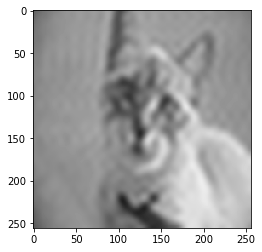

In [216]:
plt.imshow(pred, cmap="gray", vmin=-31, vmax=32)

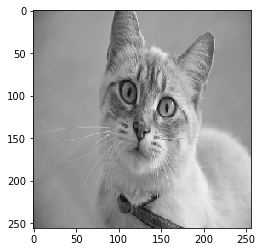

In [217]:
plt.imshow(cat_arr,cmap="gray", vmin=-128,vmax=127)